In [97]:
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [2]:
# GPU 사용
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## 데이터셋 가져오기

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [70]:
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### test data split

In [135]:
X["Proline"] = X.Proline.astype(float)

x_data = X.values
y_data = y.values

# one hot encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y_data)
y_data = ohe.transform(y_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

C:\Users\ysh\AppData\Local\Temp\ipykernel_10968\2366213320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Proline"] = X.Proline.astype(float)


### Scaling

In [136]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [137]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((142, 13), (142, 3), (36, 13), (36, 3))

### Model Compile

In [138]:
model = tf.keras.Sequential()

model.add(Dense(32, input_shape=(13,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

### Model fit

In [139]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
5/5 [==============================] - 0s 25ms/step - loss: 1.1447 - accuracy: 0.2113 - val_loss: 1.1215 - val_accuracy: 0.3056
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 1.0918 - accuracy: 0.2746 - val_loss: 1.0706 - val_accuracy: 0.3611
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 1.0432 - accuracy: 0.3521 - val_loss: 1.0232 - val_accuracy: 0.4722
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 1.0004 - accuracy: 0.4789 - val_loss: 0.9775 - val_accuracy: 0.5833
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.9615 - accuracy: 0.5845 - val_loss: 0.9334 - val_accuracy: 0.6389
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.9223 - accuracy: 0.6408 - val_loss: 0.8896 - val_accuracy: 0.6944
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.8854 - accuracy: 0.7394 - val_loss: 0.8460 - val_accuracy: 0.8333
Epoch 8/50
5/5 [===============

## PLT

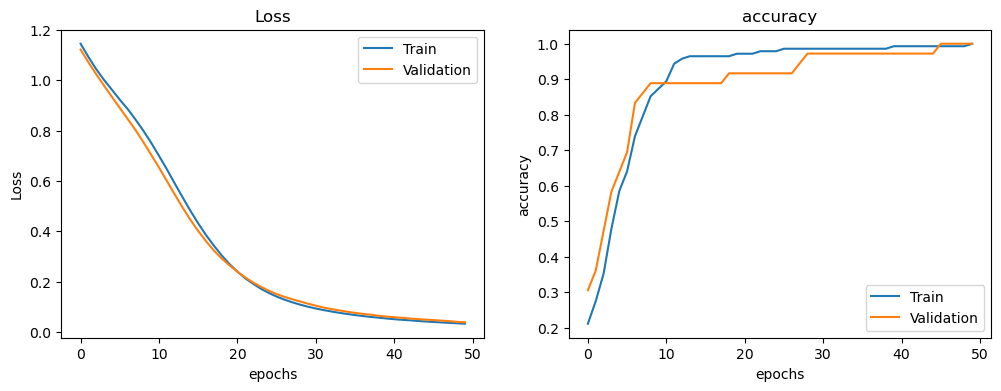

In [140]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")

plt.title("accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")

plt.legend()